<a href="https://colab.research.google.com/github/viswateja123/House_value_predictor/blob/main/TSLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
r=pd.read_csv('tesla.csv.csv')
print(r)

           Date        Open        High  ...       Close    Volume   Adj Close
0     6/29/2010   19.000000   25.000000  ...   23.889999  18766300   23.889999
1     6/30/2010   25.790001   30.420000  ...   23.830000  17187100   23.830000
2      7/1/2010   25.000000   25.920000  ...   21.959999   8218800   21.959999
3      7/2/2010   23.000000   23.100000  ...   19.200001   5139800   19.200001
4      7/6/2010   20.000000   20.000000  ...   16.110001   6866900   16.110001
...         ...         ...         ...  ...         ...       ...         ...
1687  3/13/2017  244.820007  246.850006  ...  246.169998   3010700  246.169998
1688  3/14/2017  246.110001  258.119995  ...  258.000000   7575500  258.000000
1689  3/15/2017  257.000000  261.000000  ...  255.729996   4816600  255.729996
1690  3/16/2017  262.399994  265.750000  ...  262.049988   7100400  262.049988
1691  3/17/2017  264.000000  265.329987  ...  261.500000   6475900  261.500000

[1692 rows x 7 columns]


In [3]:
r.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [16]:
training=r['Open']
print(training.head())
train=  r.iloc[:,1:2].values

0    19.000000
1    25.790001
2    25.000000
3    23.000000
4    20.000000
Name: Open, dtype: float64


In [21]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_scale=sc.fit_transform(train)
x=[]
y=[]

In [25]:
for i in range(60,len(train_scale)):
  x.append(train_scale[i-60:i,0])
  y.append(train_scale[i,0])
x=np.array(x)
y=np.array(y)  

In [26]:
print(y[0])

0.013810627947745034


In [28]:
x=np.reshape(x,(x.shape[0],x.shape[1],1))

In [30]:
from keras.models import Sequential
from keras.layers import  Dense
from keras.layers import  LSTM
from  keras.layers import Dropout

In [33]:
reg=Sequential()
reg.add(LSTM(units=50,return_sequences=True,input_shape=(x.shape[1],1)))
reg.add(Dropout(0.2))
reg.add(LSTM(units=50,return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units=50))
reg.add(Dropout(0.2))
reg.add(Dense(units=1))
reg.compile(optimizer='Adam',loss='mean_squared_error')
reg.fit(x,y,epochs=50,batch_size=32)


Epoch 1/50
102/102 [==============================] - 10s 59ms/step - loss: 0.0528
Epoch 2/50
102/102 [==============================] - 6s 62ms/step - loss: 0.0049
Epoch 3/50
102/102 [==============================] - 6s 62ms/step - loss: 0.0048
Epoch 4/50
102/102 [==============================] - 7s 64ms/step - loss: 0.0043
Epoch 5/50
102/102 [==============================] - 6s 63ms/step - loss: 0.0043
Epoch 6/50
102/102 [==============================] - 7s 65ms/step - loss: 0.0041
Epoch 7/50
102/102 [==============================] - 7s 66ms/step - loss: 0.0038
Epoch 8/50
102/102 [==============================] - 6s 64ms/step - loss: 0.0037
Epoch 9/50
102/102 [==============================] - 7s 65ms/step - loss: 0.0033
Epoch 10/50
102/102 [==============================] - 7s 66ms/step - loss: 0.0034
Epoch 11/50
102/102 [==============================] - 7s 65ms/step - loss: 0.0031
Epoch 12/50
102/102 [==============================] - 6s 63ms/step - loss: 0.0030
Epoch 13/50


In [37]:
dataset_test = pd.read_csv('tesla_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((r['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 72):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = reg.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


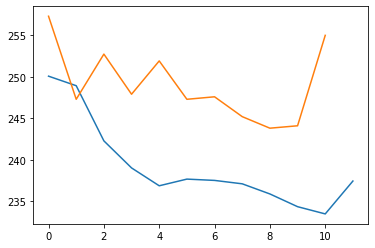

In [43]:
x=(predicted_stock_price)
y=(real_stock_price)
plt.plot(x)
plt.plot(y)